# BASEMAP Installation:
- Check the code from this same directory to SETUP the basemap LIBRARY
* Data_pre-processing_and_Basemap_Plotly

In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import requests
import json


import dask.dataframe as dd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
from geopy.geocoders import Nominatim
import time

import geopandas as gpd
from shapely.geometry import Point

#BASEMAP
import mpl_toolkits
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

import PIL as plw

# DASK to read multiple CSV files for OCO-3 - good to know if we are using multiple files

In [3]:
"""%%time
df_xco2= dd.read_csv("data_master_csv", parse_dates=["DateTime"])
len(df_xco2.Xco2.compute())"""

'%%time\ndf_xco2= dd.read_csv("data_master_csv", parse_dates=["DateTime"])\nlen(df_xco2.Xco2.compute())'

## Pandas works faster here though since I think we are just reading from one data file (?)

In [4]:
%%time
df_xco2= pd.read_csv(r"C:\Users\ddrye\OneDrive\Documents\OMSA_Program\OMSA 2023\Summer2023\Practicum\off_git\data\data_raw_csv")
counties = gpd.GeoDataFrame.from_file(r"C:\Users\ddrye\OneDrive\Documents\OMSA_Program\OMSA 2023\Summer2023\Practicum\off_git\us-county-boundaries\us-county-boundaries.shp")
len(df_xco2)

CPU times: total: 30.5 s
Wall time: 31.5 s


27552761

# Filtering the XOC2 GOOD quality - should already be done. Also dropping any uncessary columns. Selecting only one year

In [5]:
# continental US
#top = 49.3457868 # north lat
#left = -124.7844079 # west long
#right = -66.9513812 # east long
#bottom =  24.7433195 # south lat


#df_xco2=df_xco2.loc[(df_xco2['Latitude'] >= bottom) & (df_xco2['Latitude'] <=top) & (df_xco2['Longitude'] >= left) & (df_xco2['Longitude'] <= right)]
#df_xco2=df_xco2[:100]

try:
    df_xco2= df_xco2[df_xco2['xco2_quality_flag'] == 0]
    df_xco2.drop("Unnamed: 0", axis=1, inplace=True)
    df_xco2['coords'] = list(zip(df_xco2['Longitude'],df_xco2['Latitude']))
    df_xco2['coords'] = df_xco2['coords'].apply(Point)
    points = gpd.GeoDataFrame(df_xco2, geometry='coords', crs=counties.crs)
    df_xco2 = gpd.tools.sjoin(points, counties, predicate="within", how='left')
except:
    pass

df_xco2.dropna(subset=['name'], inplace=True)
df_xco2=df_xco2[["Xco2","xco2_quality_flag","DateTime","Year","Month","Day","Latitude","Longitude","name","state_name","geoid"]]
print(len(df_xco2))




print(df_xco2.head())
print(df_xco2.tail())
#df_xco2_2014 = df_xco2.loc[df_xco2['Year'] == 2014] 
#df_xco2_2015 = df_xco2.loc[df_xco2['Year'] == 2015]
#df_xco2_2016 = df_xco2.loc[df_xco2['Year'] == 2016] 
#df_xco2_2017 = df_xco2.loc[df_xco2['Year'] == 2017]
#df_xco2_2018 = df_xco2.loc[df_xco2['Year'] == 2018] 
#df_xco2_2019 = df_xco2.loc[df_xco2['Year'] == 2019]
#df_xco2_2020 = df_xco2.loc[df_xco2['Year'] == 2020] 
#df_xco2_2021 = df_xco2.loc[df_xco2['Year'] == 2021]
df_xco2_2022 = df_xco2.loc[df_xco2['Year'] == 2022]
#df_xco2_2023 = df_xco2.loc[df_xco2['Year'] == 2023]

10328594
           Xco2  xco2_quality_flag                 DateTime  Year  Month  Day  \
1032  395.67447                  0  2014-09-06 18:30:54.060  2014      9    6   
1033  395.76440                  0  2014-09-06 18:30:54.070  2014      9    6   
1034  396.62753                  0  2014-09-06 18:30:59.060  2014      9    6   
1035  394.24118                  0  2014-09-06 18:31:01.020  2014      9    6   
1036  396.93200                  0  2014-09-06 18:31:01.320  2014      9    6   

       Latitude  Longitude      name      state_name  geoid  
1032  35.265804  -79.52109     Moore  North Carolina  37125  
1033  35.260723  -79.51034     Moore  North Carolina  37125  
1034  35.565514  -79.60734  Randolph  North Carolina  37151  
1035  35.704697  -79.68605  Randolph  North Carolina  37151  
1036  35.724680  -79.69178  Randolph  North Carolina  37151  
               Xco2  xco2_quality_flag                 DateTime  Year  Month  \
27551266  419.50134                  0  2023-03-31 2

In [7]:
df_xco2_group = df_xco2.loc[(df_xco2['Year'] <= 2020) & (df_xco2['Year'] >= 2015) ]

# BOX plot of XCO2 by month

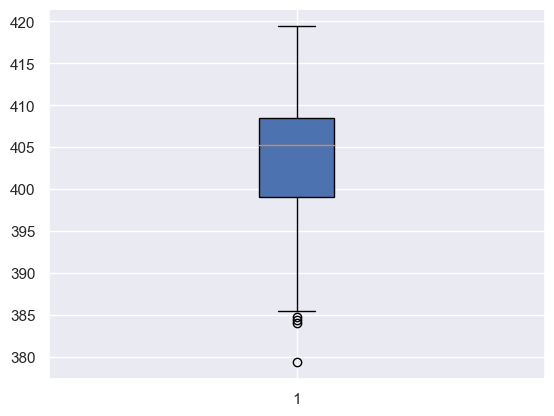

In [84]:
fig, ax= plt.subplots()
ax.boxplot(df_xco2_group["Xco2"][df_xco2_group["Month"]==8], patch_artist=True);


In [85]:
df_xco2_group.describe()

,Xco2,xco2_quality_flag,Year,Month,Day,Latitude,Longitude
count,7.091997e+06,7091997.0,7.091997e+06,7.091997e+06,7.091997e+06,7.091997e+06,7.091997e+06
mean,4.063784e+02,0.0,2.017506e+03,6.789910e+00,1.560651e+01,3.949953e+01,-1.047139e+02
std,4.996473e+00,0.0,1.722066e+00,3.259413e+00,8.631545e+00,7.494650e+00,1.652589e+01
min,3.640129e+02,0.0,2.015000e+03,1.000000e+00,1.000000e+00,2.300891e+01,-1.792211e+02
25%,4.026575e+02,0.0,2.016000e+03,4.000000e+00,8.000000e+00,3.469232e+01,-1.148239e+02
50%,4.065633e+02,0.0,2.018000e+03,7.000000e+00,1.600000e+01,3.813988e+01,-1.033420e+02
75%,4.102013e+02,0.0,2.019000e+03,1.000000e+01,2.300000e+01,4.269844e+01,-9.501613e+01
max,4.242168e+02,0.0,2.020000e+03,1.200000e+01,3.100000e+01,7.129026e+01,-6.696889e+01


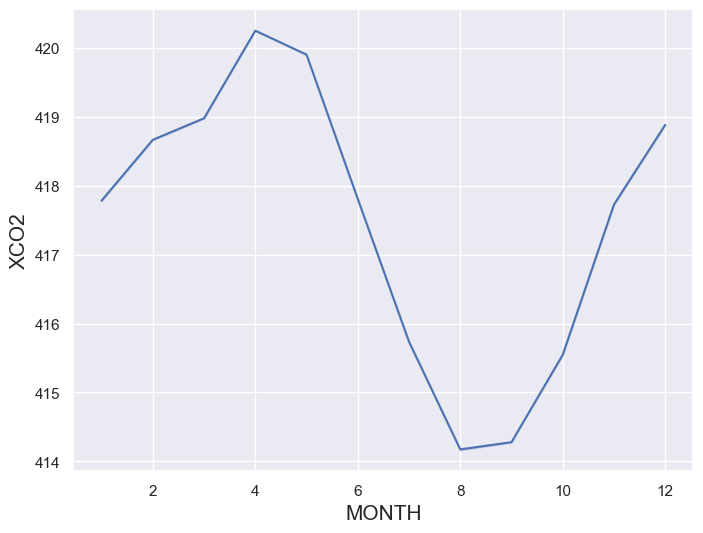

In [35]:
sns.lineplot(x= df_xco2_2022["Month"], y= df_xco2_2022["Xco2"])
plt.gcf().set_size_inches(8,6)
plt.xlabel("MONTH", fontsize= 15)
plt.ylabel("XCO2", fontsize= 15);

# MAX xco2

In [86]:
print(max(df_xco2_group["Xco2"]))

424.2168


# Location of MAX XCO2 for 2022

In [87]:
max= df_xco2_group[df_xco2_group['Xco2'] == max(df_xco2_group["Xco2"])]
max

,Xco2,xco2_quality_flag,DateTime,Year,Month,Day,Latitude,Longitude,name,state_name,geoid
16180298,424.2168,0,2019-12-16 20:16:00.320,2019,12,16,32.900654,-108.6933,Grant,New Mexico,35017


In [88]:
fig= px.scatter_mapbox(max,
                      animation_frame="Month",
                      lat="Latitude",
                      lon= "Longitude",
                      color="Xco2",
                      hover_name="DateTime",
                      zoom=1,
                      size_max= 25,
                      color_continuous_scale=px.colors.sequential.thermal,
                      title="MAX xco2 (2015)\
                       Highest XCO2 recorded at Black Lake Saskatoon CA - There was a large forest fire there.")

fig.update_layout(
mapbox_style="stamen-terrain")

#fig.show()

# Above MEAN for 2015 and 2016

In [8]:
df_xco2_group_county_mean=df_xco2_group.groupby(by="geoid").mean("Xco2").reset_index()
print(df_xco2_group_county_mean.head())
print(len(df_xco2_group_county_mean))

   geoid        Xco2  xco2_quality_flag         Year     Month        Day  \
0  01001  407.237300                0.0  2017.689626  6.397109  14.703231   
1  01003  407.724560                0.0  2017.635027  7.463235  16.314505   
2  01005  407.211062                0.0  2017.567917  8.003881  17.802070   
3  01007  407.356014                0.0  2017.343486  7.252115  14.357022   
4  01009  406.030563                0.0  2016.864865  4.600737  10.675676   

    Latitude  Longitude  
0  32.553711 -86.506728  
1  30.637153 -87.720402  
2  31.887936 -85.371716  
3  32.972406 -87.243620  
4  33.931112 -86.697989  
3129


In [9]:
"""fig = px.create_choropleth(fips=df_xco2_2022_county_mean["geoid"], values=df_xco2_2022_county_mean[1])
fig.layout.template = None
fig.show()"""
import urllib
request = urllib.request.Request('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
opener = urllib.request.build_opener()
response = opener.open(request)
counties_map = json.load(response)

fig = px.choropleth(df_xco2_group, geojson=counties_map, locations='geoid', color='Xco2',
                           color_continuous_scale="Viridis",
                           scope="usa"
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_image("fig1.png")

# MAPPING the location 

### Considering the mean value across both years
- Finding the data points higher than the mean
- The original data file is too big, we need to reduce it somehow
    - Counties, zipcodes, etc.?
    - For now, just taking every 8th reading...

In [20]:
"""fig= px.scatter_mapbox(df_xco2_above_mean,
                      animation_frame="Month",
                     
                      lat="Latitude",
                      lon= "Longitude",
                      color="Xco2",
                      center= dict(
                          lat = 42,
                          lon= -20),
                      hover_name="DateTime",
                      zoom=1.5,
                      size_max= 5,
                      color_continuous_scale=px.colors.sequential.thermal,
                      title="Values above two year mean")

fig.update_layout(
mapbox_style="carto-positron")
#fig.show()

# SAVING the graph
plotly.offline.plot(fig,
                   filename= 'C:/Users/sagarl/JPL_Project/Code_Scripts/week_10/global_oco3_xco2_higher_419.html',
                   auto_open= True)"""

#df_xco2_reduced=df_xco2_above_mean.iloc[::4, :]



fig= px.scatter_mapbox(df_xco2_reduced,
                      lat="Latitude",
                      lon= "Longitude",
                      color="Xco2",
                      #radius=2,
                      #color="Xco2",
                      mapbox_style="stamen-terrain",
                      color_continuous_scale=px.colors.sequential.thermal,
                      hover_name="DateTime",
                      #hover_name="DateTime",
                      zoom=1,
                      #size_max= 25,
                      #color_continuous_scale=px.colors.sequential.thermal,
                      #title="MAX xco2 (2015)\
                        #Highest XCO2 recorded at Black Lake Saskatoon CA - There was a large forest fire there."
                       )

#fig.show()

import plotly.graph_objects as go

"""fig.add_trace(go.Scatter(x=x, y=y + 5, name="spline",
                    text=["tweak line smoothness<br>with 'smoothing' in line object"],
                    hoverinfo='text+name',
                    line_shape='spline'))"""

#fig.write_image('my_figure.png', format='png')
plotly.offline.plot(fig,
                   filename= 'my_figure',
                   auto_open= True)


c:\Users\ddrye\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `my_figure` didn't end with .html. Adding .html to the end of your file.



'my_figure.html'

# 2020-> OCO-3, XCO2 value greater than 419 (Mauna Loa Recorded)

# BoxPlot for 2020

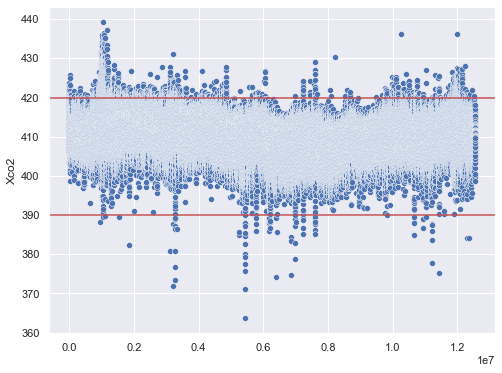

In [ ]:
# %%time
# sns.scatterplot(x=np.arange(0, len(df_2020['Month'])), y= df_2020['Xco2'])
# plt.gcf().set_size_inches(8,6)
# plt.axhline(y=420, c='r')
# plt.axhline(y= 390, c='r')
Image(filename='../week_10/scatter_plots_/oco3/2020_OCO3_xco2.png')

In [ ]:
df_2020[df_2020["Xco2"] == max(df_2020["Xco2"])]

,Xco2,Latitude,Longitude,quality_flag,DateTime,Year,Month,Day
30916,439.29108,51.728237,113.89402,0,2020-02-13 05:08:05.010,2020,2,13


In [ ]:
xco2_2020_greater_than_max= df_2020[df_2020["Xco2"]  >419]
len(xco2_2020_greater_than_max)

14996

In [ ]:
fig= px.scatter_mapbox(df_2020[df_2020["Xco2"]  >420],
                      animation_frame="Month",
                     
                      lat="Latitude",
                      lon= "Longitude",
                      color="Xco2",
                      hover_name="DateTime",
                      zoom=1.25,
                      size_max= 5,
                      #color_continuous_scale=px.colors.cmocean.ice_r,
                      color_continuous_scale=px.colors.sequential.algae,
                      title='OCO- 3\n. Atmospheric Carbon Dioxide Concentration. Year: 2020, (Xco2)> 419'
                      )

# fig.update_layout(
# mapbox_style="carto-positron")

# UPDATE the layout for background-> white
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])


fig.show()

# SAVING the graph
# plotly.offline.plot(fig,
#                    filename= 'C:/Users/sagarl/JPL_Project/Code_Scripts/week_10/OCO3_xco2_higher_419.html',
#                    auto_open= True)

# PROBLEM: processing ENTIRE dataset at the same time


## NOTE: Running the ENTIRE dataset causes error due to LOW Computation POWER

In [ ]:
# fig_entire= px.scatter_mapbox(df_xco2_good_quality,
#                               lat="Latitude",
#                               lon= "Longitude",
#                               color= "Xco2",
#                               zoom= 0,
#                               hover_name="DateTime"
# )
# fig_entire.update_layout(
#     mapbox_style= "satellite"
# )
# fig_entire.show()

# NOTE: Handling Big Data

## We can REDUCE The datasets by taking 5th row till end
- ASSUMING less variations between 5 RECORDS each

In [ ]:
len(df_xco2_good_quality)

16520069

### LINE plot to reflect the variations of XCO2 within 8 ROWS datasets

<AxesSubplot:ylabel='Xco2'>

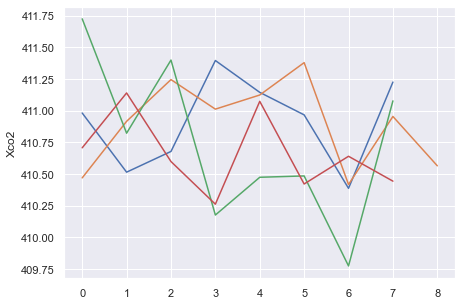

In [ ]:
# fig, ax= plt.subplots(1,2)
plt.gcf().set_size_inches(7,5)
sns.lineplot(x= np.arange(0, len(df_2019["Xco2"].iloc[:8])), y= df_2019["Xco2"].iloc[:8])
sns.lineplot(x= np.arange(0, len(df_2019["Xco2"].iloc[8:17])), y= df_2019["Xco2"].iloc[8:17])
sns.lineplot(x= np.arange(0, len(df_2019["Xco2"].iloc[17:25])), y= df_2019["Xco2"].iloc[17:25])
sns.lineplot(x= np.arange(0, len(df_2019["Xco2"].iloc[25:33])), y= df_2019["Xco2"].iloc[25:33])

In [ ]:
df_xco2_good_quality.iloc[::4, :]

,Xco2,Latitude,Longitude,quality_flag,DateTime,Year,Month,Day
0,410.98047,-24.961294,80.657340,0,2019-08-06 03:50:04.010,2019,8,6
4,411.14368,-24.862957,80.665050,0,2019-08-06 03:50:04.050,2019,8,6
16,410.46835,-24.929485,80.687386,0,2019-08-06 03:50:04.710,2019,8,6
26,411.12274,-24.824290,80.722130,0,2019-08-06 03:50:05.340,2019,8,6
40,410.56372,-24.818876,80.789536,0,2019-08-06 03:50:07.010,2019,8,6
...,...,...,...,...,...,...,...,...
230101,409.88168,-47.310383,-123.389275,0,2020-12-31 23:17:57.050,2020,12,31
230171,408.21646,-47.430440,-123.079100,0,2020-12-31 23:18:00.740,2020,12,31
230321,409.54200,-48.683254,-118.744660,0,2020-12-31 23:18:49.750,2020,12,31
230356,407.32565,-48.944027,-117.803734,0,2020-12-31 23:19:02.050,2020,12,31


################

# BASEMAP: style 'ORHTO' 
- Rotating GLobe has certain parameters to be followed
- REQUIRES: lat_0=0, lon_0=0

## By default, set the LAT and LON 
- Lat_0 -> 10
- Lon_0= 180

# NOTE: Changes on this MAP function
- Color Normalization set to default, no <b>LOG</b> numbers used
- Resolution of the GLOBAL map set to LOWER than 'l' -> crude 'c'


In [ ]:
#BASEMAP function
# create a function that creates a BASEMAP
def draw_map_xco2_img( year,day, data, lat_0=0, lon_0=0, x="longiture",y= "latitude", lon_min= -180, lon_max= 180, lat_min= -90, lat_max= 90, size_point= 1, frontier= False):
    
    # Figure setting
    
    plt.figure(figsize= (22, 11), edgecolor='b')

    #PROJECTION for ROBIN requires to state lat_0, and lon_0
    m= Basemap(projection='ortho',
              lat_0= lat_0, lon_0= lon_0,
              resolution='c')
            
    # map style

    # XCO2 VARIATIONS
    #normal= matplotlib.colors.LogNorm(vmin= data['Xco2'].min(), vmax= data['Xco2'].max())
    normal= matplotlib.colors.LogNorm(vmin= 364.183, vmax= 435.6072)
    
    
# LEAVE the NOrm to default
# REQUIRES to pass coordinates using BASEMAP(x,y)
# COLORS: rainbow, turbo
    x, y= m(data['Longitude'].values, data['Latitude'].values)
    m.scatter( x, y, c= data['Xco2'], cmap= plt.cm.rainbow, s=15, #norm= normal,
             marker='D')    #D

    
    # Customizing the COLORBAR
    cbar= plt.colorbar(orientation= "horizontal",
                      format= "%.0f",
                      extend="both",
                      shrink= 0.5,
                      aspect= 15,
                      pad= 0.04)
                      
        
    # MAX and MIN from the TOTAL year of 2019 only
    # LIMIT on the color bAR
    # min and max with linear Space ->5

    
    cbar.set_label(label="XCO2 (parts per million)", size= 35)
    cbar.ax.tick_params(labelsize= 24)
    
    #testing the CBAR
  
    cbar.set_ticks(np.linspace(390, 430, 5))

    plt.clim(390, 430) 
    # BORDER LINES
    m.drawmapboundary(fill_color='black')
    m.drawcoastlines(linewidth= 0.15)
    
    # changing BACKGROUND color
    m.fillcontinents(color='white', alpha= 0.12 )
    #plt.title(str(day), fontsize= 30)
    plt.title('Orbiting Carbon Observatory- 3\nAtmospheric Carbon Dioxide Concentration\nYear: '+str(year)+ ', XCO2 > 419', fontsize =30)
    #title.set_position([.5, .10])
    
    
#     plt.savefig("C:/Users/sagarl/JPL_Project/Code_Scripts/week_10/16_day_cycle_images_BASEMAP/day_"+str(day)+".jpeg",
#                dpi= 200)
    
#    plt.savefig('test.jpeg')

In [ ]:
df_2020["Xco2"].describe()

count    1.255528e+07
mean     4.106445e+02
std      2.575777e+00
min      3.636155e+02
25%      4.091987e+02
50%      4.106400e+02
75%      4.122251e+02
max      4.392911e+02
Name: Xco2, dtype: float64

In [ ]:
len(xco2_2019_greater_than_max)

2021

# TESTTING
- Below Map represents the data of XCO2 values greater than 419

Wall time: 5.26 s


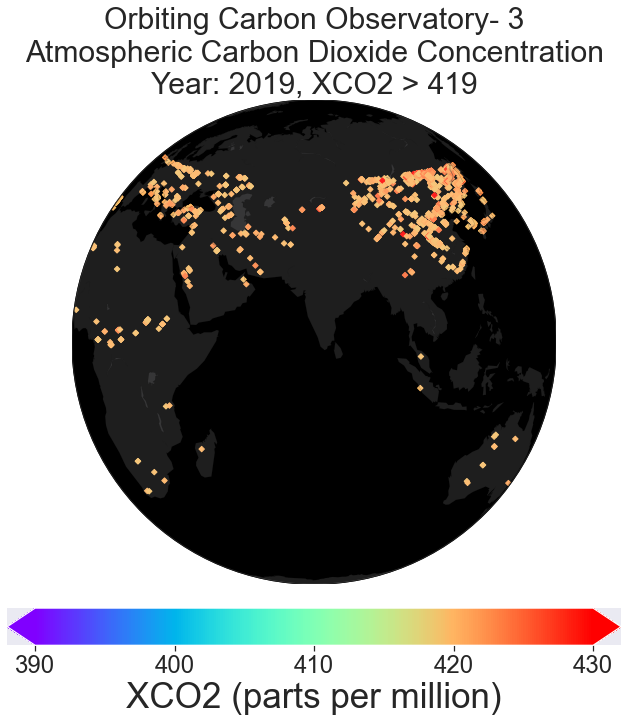

In [ ]:
%%time
draw_map_xco2_img("2019","TEST",xco2_2019_greater_than_max, lat_0= 10, lon_0= 75)

In [ ]:
# %%time
# draw_map_xco2_img("OCO-3, xco2> 420",xco2_2020_greater_than_max, lat_0= 10, lon_0= 75)

# 16 day cycle

In [ ]:
df_2019.head(2)

,Xco2,Latitude,Longitude,quality_flag,DateTime,Year,Month,Day
0,410.98047,-24.961294,80.65734,0,2019-08-06 03:50:04.010,2019,8,6
1,410.51340,-24.936787,80.65936,0,2019-08-06 03:50:04.020,2019,8,6


# AUG month

In [ ]:
aug_2019= df_2019[df_2019["Month"] == 8]

# MAX and MIN of 2019

In [ ]:
min(df_2019["Xco2"]), max(df_2019["Xco2"])

(364.183, 435.6072)

In [ ]:
first_16_days= np.arange(1, 17)
first_16_days

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

# FIRST 16 day cycle of 2019
## OCO-3
### TESTING:
- Selecting the RECORDS that falls on first 15 day period only

Wall time: 2.7 s


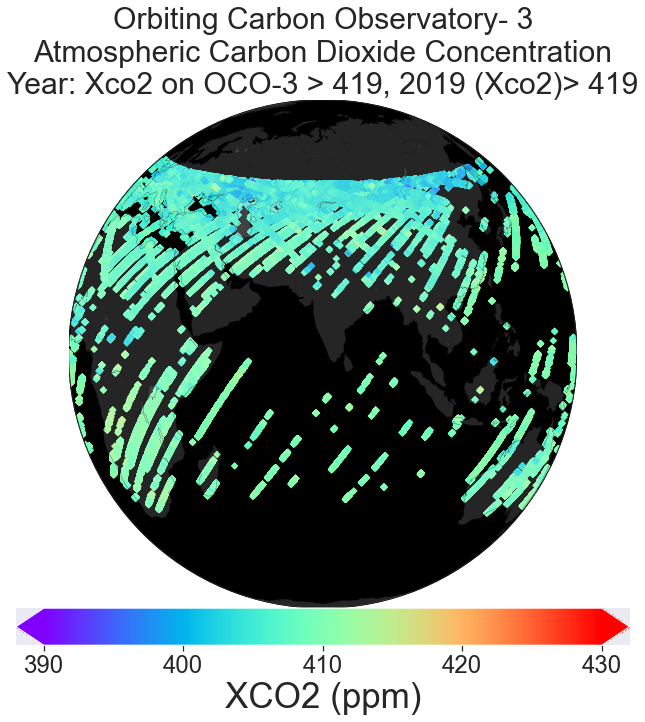

In [ ]:
%%time
draw_map_xco2_img("Xco2 on OCO-3 > 419, 2019","TEST-2",aug_2019[aug_2019["Day"].isin(first_16_days)], lat_0= 10, lon_0= 75)

# ENTIRE dataset for OCO-3

## FOR rotation of the globe
- We can use NUMPY linear space
- Linear Space creates the range of NUMPY array based on the INITIAL point, END point, and third param for the lenght

In [ ]:
x_val= [-10. , 10.]
y_val= [-180. , 180]

r_steps= 160

# Linear steps for Globe to ROTATE
lat_s= np.linspace(x_val[0], x_val[1], r_steps)
lon_s= np.linspace(y_val[0], y_val[1], r_steps)

# Creating a ORHTO map, XCO2 > 419, OCO-3, 2020
- 2020 year has greater number of datapoints higher than 420 than in 2019
- UNcomment the CODE below. This generates the code upto the number of 'r_steps' declared

In [ ]:
# rotation= 0

# for j in range(0, r_steps):
    
    
#     draw_map_xco2_img("2020",str(j), xco2_2020_greater_than_max,
#                       lat_0= lat_s[rotation], lon_0= lon_s[rotation])
    
#     # rotate the globe
#     rotation +=1


# Creating a GIF
- EVERY files that has been generated above will be stored numerically starting from 1
- We can combine the files that will create an animation GIF file

In [ ]:
# full_cycle_frames=[]


# # DOUBLE check the RANGE of the datasets
# days_full= np.arange(0, 160)

# # looping over the IMGAES 
# for j in days_full:
#     day_one= plw.Image.open('C:/Users/sagarl/JPL_Project/Code_Scripts/week_10/16_day_cycle_images_BASEMAP/day_'+str(j)+ '.jpeg')
#     full_cycle_frames.append(day_one)
    

# # Creating a GIF
# # Customize DURATION for speed of rotation

# full_cycle_frames[0].save('2020_black_OCO-3_xco2_Max_Ortho.gif', format= 'GIF',
#                     append_images= full_cycle_frames[1:],
#                     save_all= True, duration= 250,
#                     fps=2,
#                     loop= 0)

In [ ]:
# # DISPLAYING up the date and month in animation
# year_2019_month= []
# year_2020_month= []

# years= ['2019', '2020']
# months= ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
# for i in range(0, 2):
    
#     for k in range(0, 12):
#         print(years[i],'/',months[k])
#         year_2019_month